### **Time Series using Tensorflow**

In [22]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

In [2]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

model_1_results = {'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

In [3]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [4]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


**17. Building Model 2 (same as model 1) (horizon = 1, window = 30)**

In [5]:
#  using the dataframe of bit-coin prices
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

# WINDOWING 
HORIZON = 1
WINDOW_SIZE = 30

full_windows,full_labels = tsf.make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

# train-test split without windowing
train_percent = 80
split_size = int(train_percent*0.01*len(timesteps))
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]

# create train and test windows split
train_windows,test_windows,train_labels,test_labels = tsf.make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [6]:
# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,savepath='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f'{savepath}/{model_name}.keras',
                                              verbose = 0,
                                              monitor='val_loss',
                                              save_best_only = True
                                              )

In [8]:
# 1. model creation
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
], name='model_2')

# 2. model compiling
model_2.compile(loss = 'mae',optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# 3. fit the model
model_2.fit(x=train_windows,
            y=train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            verbose = 1,
            callbacks=[create_model_checkpoint(model_2.name)]
            )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2445.1680 - mae: 2445.1680 - mse: 19752916.0000 - val_loss: 3588.1726 - val_mae: 3588.1726 - val_mse: 29434196.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 496.7064 - mae: 496.7064 - mse: 950265.8125 - val_loss: 2297.1448 - val_mae: 2297.1448 - val_mse: 13977879.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 321.3965 - mae: 321.3965 - mse: 473870.4062 - val_loss: 1494.8678 - val_mae: 1494.8678 - val_mse: 6413083.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 261.3158 - mae: 261.3158 - mse: 320027.2500 - val_loss: 1335.3239 - val_mae: 1335.3239 - val_mse: 5433254.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 229.9444 - mae: 229.9444 - mse: 250875.9062 - val_loss: 1182.9667 - val_mae: 1182.9667 - val_mse: 4424136.0000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 203.3528 - mae: 203.3528 - mse: 201168.0781 - val_loss: 1166.7355 - val_mae: 1166.73

In [9]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

In [10]:
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310.1934 - mae: 310.1934 - mse: 372177.6562


[603.9505004882812, 603.9505004882812, 1257351.125]

In [19]:
# load in saved best performing model_1 & model_2 and evaluate it on test data
model_2 = tf.keras.models.load_model(f'model_experiments/{model_2.name}.keras')

In [12]:
model_2.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 303.1388 - mae: 303.1388 - mse: 372492.5312 


[597.3115234375, 597.3115234375, 1246714.0]

In [14]:
# making forcasts with the model_1 on test dataset
def make_preds(model,input_data):
    '''
    Uses model to make predictions on input data
    '''

    forcast = model.predict(input_data)
    return tf.squeeze(forcast) # return 1D array of predictions

model_2_preds=make_preds(model_2,test_windows)
len(model_2_preds),model_2_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8788.89  , 8737.218 , 8742.714 , 8645.927 , 8482.379 , 8485.693 ,
        8174.1626, 8030.346 , 8020.2305, 7848.0776], dtype=float32)>)

In [15]:
model_2_results = tsf.evaluate_time_series(tf.squeeze(test_labels),model_2_preds)
model_2_results

{'mae': 597.3115,
 'mse': 1246714.0,
 'rmse': 1116.5635,
 'mape': 2.696134,
 'mase': 1.0441062}

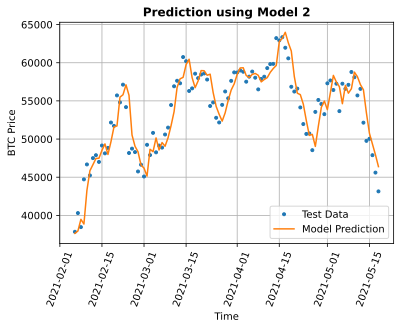

In [21]:
# plotting model_2 predictions
offset = 450
end = None
plt.figure(figsize=(6,4))

# account for test_window offset and index into test_labels to ensure correct plotting
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = tf.squeeze(test_labels),start = offset,end=end,label = "Test Data")
tsf.plot_time_series(timesteps = X_test[-len(test_windows):] , values = model_2_preds,start = offset,end=end,label = "Model Prediction", format='-',xtick_rotation=70,ylabel='BTC Price')
plt.title("Prediction using Model 2",fontsize = 12, fontweight='bold')
plt.show()

***-- CONTD IN NEXT NOTEBOOK --***